In [1]:
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
#import wikipediaapi  #0.5.8
#import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
#import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
#import dateparser #1.1.7

In [3]:
nlp = spacy.load("en_core_web_md")

In [7]:
txt = """ Peter travels to London.
        Frank likes in Berlin.
        Marta goes to Paris.
        Frank visits to Madrid.
        Kepa goes to Bilbao.
        Hellen likes from Berlin.
        Peter goes to Paris.
        John flies to Vienna.
        """
doc = nlp(txt)

lst_docs = [sent for sent in doc.sents]



## extract entities and relations
dic2 = {"id":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs):
    dic2["id"].append(n)
    for token in sentence: 
        match token.dep_:
            case "nsubj":
                dic2["entity"].append(token.text)
            case "pobj":
                dic2["object"].append(token.text)
            case "ROOT":
                dic2["relation"].append(token.lemma_)      
    
                                        
print(dic2)   
## create dataframe
dtf2 = pd.DataFrame(dic2)

dtf2


{'id': [0, 1, 2, 3, 4, 5, 6, 7], 'entity': ['Peter', 'Frank', 'Marta', 'Frank', 'Kepa', 'Hellen', 'Peter', 'John'], 'relation': ['travel', 'like', 'go', 'visit', 'go', 'like', 'go', 'fly'], 'object': ['London', 'Berlin', 'Paris', 'Madrid', 'Bilbao', 'Berlin', 'Paris', 'Vienna']}


,id,entity,relation,object
0,0,Peter,travel,London
1,1,Frank,like,Berlin
2,2,Marta,go,Paris
3,3,Frank,visit,Madrid
4,4,Kepa,go,Bilbao
5,5,Hellen,like,Berlin
6,6,Peter,go,Paris
7,7,John,fly,Vienna


['Peter', 'London', 'Frank', 'Berlin', 'Marta', 'Paris', 'Madrid', 'Kepa', 'Bilbao', 'Hellen', 'John', 'Vienna']
[('Peter', 'London'), ('Peter', 'Paris'), ('Frank', 'Berlin'), ('Frank', 'Madrid'), ('Marta', 'Paris'), ('Kepa', 'Bilbao'), ('Hellen', 'Berlin'), ('John', 'Vienna')]
['Peter', 'Peter', 'Frank', 'Frank', 'Marta', 'Kepa', 'Hellen', 'John']


/home/data/Documents/CursoIA/Jupiter/.Jupiter/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


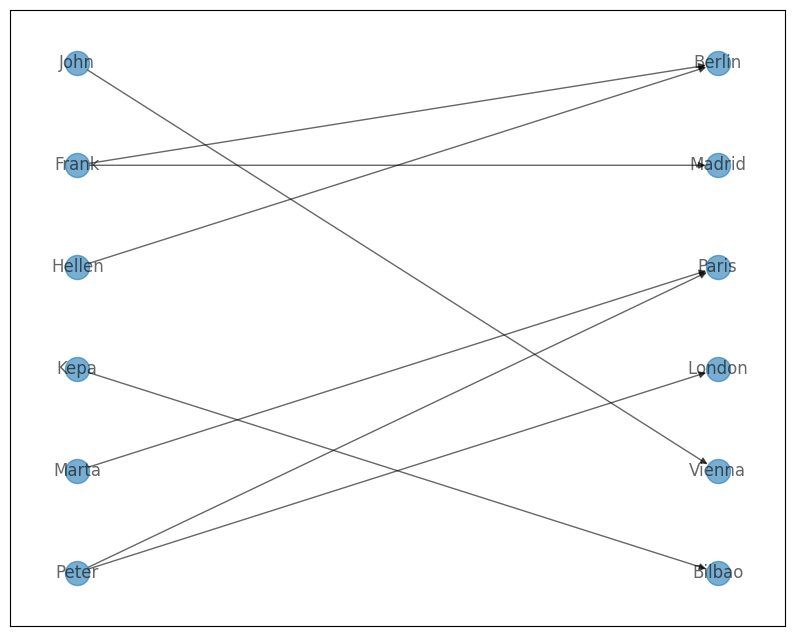

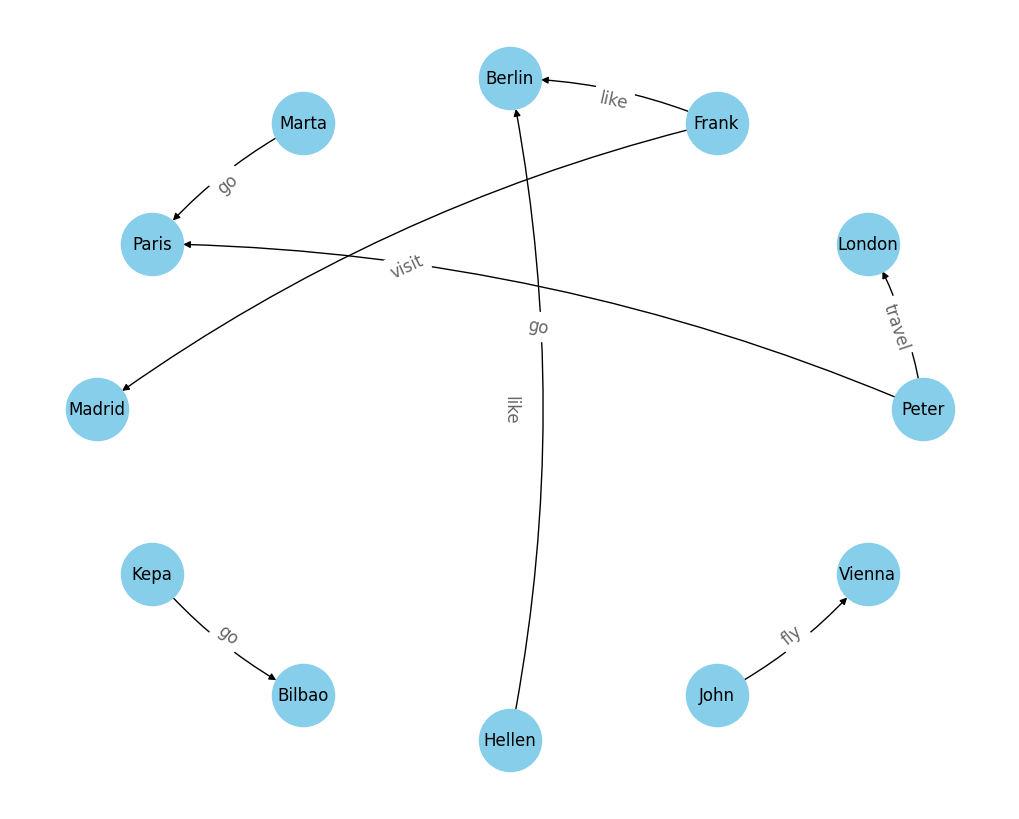

In [8]:
## create full graph
G = nx.from_pandas_edgelist(dtf2, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())

# plot como grafo bipartito ( columna:personas  ; columna:ciudades)
print(G.nodes())
print(G.edges())
entity = [ ent for ent,obj in G.edges()]
print (entity)

from networkx.algorithms import bipartite
plt.figure(figsize=(10,8))
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, entity),
    #label_pos=0.5, 
    #edge_labels=nx.get_edge_attributes(G,'relation'),
    font_size=12,
    font_color='black',
    alpha=0.6
)

## plot como lo hace el tutorial
plt.figure(figsize=(10,8))

pos = nx.circular_layout(G, )
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()
